In [1]:
import requests

CLIENT_ID = 'your client id'CLIENT_SECRET = 'your client secret'

In [3]:
import pandas as pd
import numpy as np
import json
import requests
import urllib.parse
import spotipy.util as util

In [4]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from collections import Counter
import numpy as np 

In [5]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [6]:
AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [7]:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [14]:
BASE_URL = "https://api.spotify.com/v1/"

In [15]:
# This is to send request 
def send_request(send_type_,id_,remaining_ = ""):
    return requests.get(BASE_URL + send_type_ +"/"+ id_ + "/"+remaining_, headers=headers).json()

In [16]:
myPlaylistID = '5vtOyKHHk62IvCvj82bmOw'
myPlaylist = send_request("playlists", myPlaylistID,"tracks")

In [17]:
# This is to get the song ID of a song
def get_id(dict_):
    return dict_["track"]["id"]

In [18]:
# This is to get all details of a song 
def getSongDetail(trackID_):
    # Get the audio feature of a song 
    audioFeatures = send_request("audio-features" , trackID_)
    # Get the information of a song 
    songDetails = send_request("tracks", trackID_)
    songName = songDetails["name"]
    artists = songDetails["artists"]
    artistsName = [x["name"] for x in artists]
    # Combine all into a dict
    return {**{"Song_Name": songName, "Artists": artistsName},**audioFeatures}

In [19]:
mySongs = []
for song in myPlaylist["items"]:
    mySongs.append(getSongDetail(get_id(song)))

In [20]:
mySongsDF = pd.DataFrame(mySongs)

In [21]:
mySongsDF.head()

,Song_Name,Artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Siapkah Kau 'Tuk Jatuh Cinta Lagi,[Hivi!],0.632,0.705,7,-5.666,1,0.0405,0.2830,0.000000,0.1370,0.900,141.948,audio_features,5ktkcnEDkrybwz7XEWjQV9,spotify:track:5ktkcnEDkrybwz7XEWjQV9,https://api.spotify.com/v1/tracks/5ktkcnEDkryb...,https://api.spotify.com/v1/audio-analysis/5ktk...,279999,4
1,It's Only Me - Studio Version,[Kaleb J],0.602,0.298,4,-13.333,1,0.0385,0.3100,0.000000,0.1170,0.316,119.889,audio_features,2CoxJRIhTKvHyFIq9FcDO5,spotify:track:2CoxJRIhTKvHyFIq9FcDO5,https://api.spotify.com/v1/tracks/2CoxJRIhTKvH...,https://api.spotify.com/v1/audio-analysis/2Cox...,203076,4
2,Ku Katakan Dengan Indah,[Noah],0.567,0.665,2,-7.643,1,0.0258,0.0297,0.000173,0.3290,0.350,97.989,audio_features,6BoNSwDY8YVRtjm6FGWSdL,spotify:track:6BoNSwDY8YVRtjm6FGWSdL,https://api.spotify.com/v1/tracks/6BoNSwDY8YVR...,https://api.spotify.com/v1/audio-analysis/6BoN...,371731,4
3,1000 Tahun Lamanya,[Tulus],0.707,0.475,5,-8.259,1,0.0454,0.6180,0.000300,0.1370,0.764,85.993,audio_features,2x9UGhofPBZdeam4uZCUID,spotify:track:2x9UGhofPBZdeam4uZCUID,https://api.spotify.com/v1/tracks/2x9UGhofPBZd...,https://api.spotify.com/v1/audio-analysis/2x9U...,232227,4
4,Sweet Night,[V],0.462,0.339,3,-7.943,1,0.0250,0.4950,0.000008,0.0893,0.149,92.106,audio_features,39EXZNMxb4RBHlRjnRaOKp,spotify:track:39EXZNMxb4RBHlRjnRaOKp,https://api.spotify.com/v1/tracks/39EXZNMxb4RB...,https://api.spotify.com/v1/audio-analysis/39EX...,214259,4


In [22]:
mySongsDF.to_csv("sarahssong.csv")

In [23]:
numeric_Variable = ["danceability", "energy",  "loudness", "speechiness",
       "acousticness", "instrumentalness", "liveness", "valence", "tempo","duration_ms"]
mySongsNumericDF = mySongsDF[numeric_Variable]

# This is to standardize all numeric variables
mysongsScaler = StandardScaler().fit(mySongsNumericDF)
mysongsNormalizedDF = mysongsScaler.transform(mySongsNumericDF)

In [24]:
# This is to return the sum of squared distances of samples to their closest cluster center.
def get_inertia(n_cluster_,df_):
    return  KMeans(n_clusters = n_cluster_, random_state= 42).fit(df_).inertia_

In [25]:
mySongSqDistance = []
for i in range(1,10):
    mySongSqDistance.append(get_inertia(i,mysongsNormalizedDF))

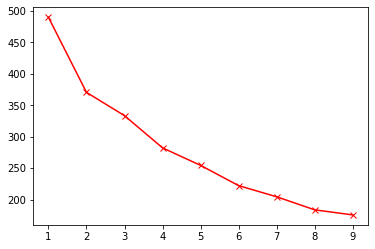

In [26]:
plt.plot(range(1,10), mySongSqDistance, "rx-")
plt.show()

In [27]:
kMeansResult = KMeans(n_clusters = 2, random_state= 42).fit(mysongsNormalizedDF)

In [28]:
kMeansResult.labels_

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0])

In [29]:
Counter(kMeansResult.labels_)

Counter({0: 24, 1: 25})

In [30]:
print(sum(kMeansResult.labels_))
print(len(kMeansResult.labels_))

25
49


In [31]:
kMeansResult.cluster_centers_

array([[-0.0333265 ,  0.82463379,  0.69265284,  0.12505588, -0.7729245 ,
        -0.24908687,  0.55221005,  0.50056253,  0.24105244,  0.2997632 ],
       [ 0.03199344, -0.79164843, -0.66494672, -0.12005364,  0.74200752,
         0.23912339, -0.53012165, -0.48054003, -0.23141034, -0.28777267]])

In [32]:
mySongsDF["kCluster"] = kMeansResult.labels_.tolist()

In [33]:
list(mySongsDF[mySongsDF["kCluster"]==1]["Song_Name"])

["It's Only Me - Studio Version",
 '1000 Tahun Lamanya',
 'Sweet Night',
 'Himalaya',
 'Kutunggu Kau Putus',
 'SAY SO (feat. JoJo)',
 'One Last Cry',
 'Satu Yang Tak Bisa Lepas - From "Hijab"',
 'Lego House - Acoustic',
 'One Last Cry',
 'Menunggu Kamu',
 'Selamat Jalan Kekasih',
 'Sunburn',
 'Andai Dia Tahu',
 'Cinta Dan Rahasia',
 'Leaving On A Jet Plane',
 'Christmas Tree',
 'Keajaiban',
 'Penasaran',
 'Just For You - Acoustic',
 "In Case You Didn't Know",
 'One Thing - Acoustic',
 'Nightfalling',
 'Just You',
 'Singgah']

In [34]:
playlist_id = "71FLonJRiMBiWDsf29H0vO"
playlist = send_request("playlists", playlist_id,"tracks")

In [35]:
playlist_songs = []
for song in playlist['items']:
    playlist_songs.append(getSongDetail(get_id(song)))

In [36]:
playlist_songsDF = pd.DataFrame(playlist_songs)
playlist_songsNumericDF = playlist_songsDF[numeric_Variable]

In [37]:
playlist_songsNormalizedDF = mysongsScaler.transform(playlist_songsNumericDF)
playlist_songsPredict = kMeansResult.predict(playlist_songsNormalizedDF)

In [38]:
playlist_songsDF["kCluster"] = playlist_songsPredict

In [39]:
playlist_songsDF[playlist_songsDF["kCluster"]==1].head()

,Song_Name,Artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,kCluster
0,Thank You,[Dido],0.722,0.595,1,-9.928,0,0.0415,0.2840,0.000540,...,0.738,79.981,audio_features,751gBcu62kORDelX7FV0mM,spotify:track:751gBcu62kORDelX7FV0mM,https://api.spotify.com/v1/tracks/751gBcu62kOR...,https://api.spotify.com/v1/audio-analysis/751g...,217827,4,1
3,Good Times,[Edie Brickell],0.562,0.314,10,-15.213,0,0.0298,0.4400,0.000011,...,0.571,166.847,audio_features,6UPfnVoOq3y3BvapBIKs8J,spotify:track:6UPfnVoOq3y3BvapBIKs8J,https://api.spotify.com/v1/tracks/6UPfnVoOq3y3...,https://api.spotify.com/v1/audio-analysis/6UPf...,189827,4,1
4,Lost In Space,[Lighthouse Family],0.496,0.497,2,-11.257,1,0.0266,0.2560,0.603000,...,0.390,82.720,audio_features,63RrpB6Vv5SYJufRu2hsGG,spotify:track:63RrpB6Vv5SYJufRu2hsGG,https://api.spotify.com/v1/tracks/63RrpB6Vv5SY...,https://api.spotify.com/v1/audio-analysis/63Rr...,320360,4,1
5,Stay (I Missed You),[Lisa Loeb & Nine Stories],0.676,0.592,1,-6.887,1,0.0452,0.4540,0.000000,...,0.337,80.316,audio_features,7Lwo27zrXusqUlAaTgnytp,spotify:track:7Lwo27zrXusqUlAaTgnytp,https://api.spotify.com/v1/tracks/7Lwo27zrXusq...,https://api.spotify.com/v1/audio-analysis/7Lwo...,183760,4,1
9,Linger,[The Cranberries],0.439,0.434,7,-14.918,1,0.0265,0.0783,0.000049,...,0.204,94.845,audio_features,0gEyKnHvgkrkBM6fbeHdwK,spotify:track:0gEyKnHvgkrkBM6fbeHdwK,https://api.spotify.com/v1/tracks/0gEyKnHvgkrk...,https://api.spotify.com/v1/audio-analysis/0gEy...,274707,4,1


In [40]:
list(playlist_songsDF[playlist_songsDF["kCluster"]==1]["Song_Name"])

['Thank You',
 'Good Times',
 'Lost In Space',
 'Stay (I Missed You)',
 'Linger',
 'Time After Time - 2013 Remaster',
 'More Than Words',
 'Tension',
 "Superman (It's Not Easy)",
 'Sway']

In [41]:
list(zip(playlist_songsNormalizedDF,playlist_songsPredict))[0]

(array([ 1.30134257,  0.28767573, -1.00169232, -0.03818209, -0.51341179,
        -0.24131746, -1.13280557,  1.14678201, -1.48172576, -0.42114388]),
 1)

In [42]:
playlist_songsDF["Distance_to_Centroid"]=[np.linalg.norm(
    result[0]-kMeansResult.cluster_centers_[result[1]]) 
    for result in list(zip(playlist_songsNormalizedDF,
                           playlist_songsPredict))
]

In [43]:
playlist_songsDF.head()

,Song_Name,Artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,kCluster,Distance_to_Centroid
0,Thank You,[Dido],0.722,0.595,1,-9.928,0,0.0415,0.284,0.000540,...,79.981,audio_features,751gBcu62kORDelX7FV0mM,spotify:track:751gBcu62kORDelX7FV0mM,https://api.spotify.com/v1/tracks/751gBcu62kOR...,https://api.spotify.com/v1/audio-analysis/751g...,217827,4,1,3.048880
1,A Letter To Elise,[The Cure],0.530,0.592,9,-13.444,1,0.0309,0.189,0.001740,...,150.224,audio_features,7mEGddVRDdESAibWOnbXoA,spotify:track:7mEGddVRDdESAibWOnbXoA,https://api.spotify.com/v1/tracks/7mEGddVRDdES...,https://api.spotify.com/v1/audio-analysis/7mEG...,312240,4,0,3.765327
2,Here's Where the Story Ends,[The Sundays],0.622,0.693,7,-8.619,1,0.0274,0.288,0.000001,...,109.055,audio_features,5gSHlT2SI0dtjeHrjj96A1,spotify:track:5gSHlT2SI0dtjeHrjj96A1,https://api.spotify.com/v1/tracks/5gSHlT2SI0dt...,https://api.spotify.com/v1/audio-analysis/5gSH...,230040,4,0,2.184822
3,Good Times,[Edie Brickell],0.562,0.314,10,-15.213,0,0.0298,0.440,0.000011,...,166.847,audio_features,6UPfnVoOq3y3BvapBIKs8J,spotify:track:6UPfnVoOq3y3BvapBIKs8J,https://api.spotify.com/v1/tracks/6UPfnVoOq3y3...,https://api.spotify.com/v1/audio-analysis/6UPf...,189827,4,1,3.580367
4,Lost In Space,[Lighthouse Family],0.496,0.497,2,-11.257,1,0.0266,0.256,0.603000,...,82.720,audio_features,63RrpB6Vv5SYJufRu2hsGG,spotify:track:63RrpB6Vv5SYJufRu2hsGG,https://api.spotify.com/v1/tracks/63RrpB6Vv5SY...,https://api.spotify.com/v1/audio-analysis/63Rr...,320360,4,1,10.426935


In [44]:
list(playlist_songsDF[playlist_songsDF["kCluster"]==1].nsmallest(5,"Distance_to_Centroid")['Song_Name'])

['Time After Time - 2013 Remaster',
 'Sway',
 'Stay (I Missed You)',
 'Tension',
 "Superman (It's Not Easy)"]

In [45]:
playlist_songsDF[playlist_songsDF["kCluster"]==0].nsmallest(5,"Distance_to_Centroid")

,Song_Name,Artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,kCluster,Distance_to_Centroid
24,I Think God Can Explain,[Splender],0.480,0.729,10,-4.398,1,0.0280,0.0129,0.000000,...,137.232,audio_features,3YW5qaMNCsMnta8L0j1btB,spotify:track:3YW5qaMNCsMnta8L0j1btB,https://api.spotify.com/v1/tracks/3YW5qaMNCsMn...,https://api.spotify.com/v1/audio-analysis/3YW5...,236760,4,0,2.080059
28,Someday We'll Know,[New Radicals],0.650,0.663,1,-7.163,0,0.0291,0.2080,0.000000,...,109.415,audio_features,5X0zqWSaSnulsbf74CrljV,spotify:track:5X0zqWSaSnulsbf74CrljV,https://api.spotify.com/v1/tracks/5X0zqWSaSnul...,https://api.spotify.com/v1/audio-analysis/5X0z...,217467,4,0,2.102819
6,Still,[Macy Gray],0.609,0.631,11,-6.957,1,0.0545,0.0622,0.000040,...,143.938,audio_features,3N0F0Q3VNFkSFqTkhQ14kq,spotify:track:3N0F0Q3VNFkSFqTkhQ14kq,https://api.spotify.com/v1/tracks/3N0F0Q3VNFkS...,https://api.spotify.com/v1/audio-analysis/3N0F...,255093,4,0,2.117523
2,Here's Where the Story Ends,[The Sundays],0.622,0.693,7,-8.619,1,0.0274,0.2880,0.000001,...,109.055,audio_features,5gSHlT2SI0dtjeHrjj96A1,spotify:track:5gSHlT2SI0dtjeHrjj96A1,https://api.spotify.com/v1/tracks/5gSHlT2SI0dt...,https://api.spotify.com/v1/audio-analysis/5gSH...,230040,4,0,2.184822
29,Ironic - 2015 Remaster,[Alanis Morissette],0.408,0.582,11,-8.305,1,0.0508,0.2180,0.000000,...,114.926,audio_features,1d6KS9GH06JAd19uiBy9IE,spotify:track:1d6KS9GH06JAd19uiBy9IE,https://api.spotify.com/v1/tracks/1d6KS9GH06JA...,https://api.spotify.com/v1/audio-analysis/1d6K...,230000,5,0,2.222076
